# Testing out SymPy solve

In [1]:
%matplotlib inline
from sympy import init_printing
init_printing(use_latex='mathjax')

import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

## ODE

In [2]:
from sympy import *
x, y, z, t = symbols('x y z t')
f, g = sp.symbols('f g', cls=Function)

In [3]:
f(x)

f(x)

In [4]:
f(x).diff(x)

d       
──(f(x))
dx      

In [5]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))


In [6]:
diffeq

                      2               
         d           d                
f(x) - 2⋅──(f(x)) + ───(f(x)) = sin(x)
         dx           2               
                    dx                

In [7]:
dsolve(diffeq, f(x))

                    x   cos(x)
f(x) = (C₁ + C₂⋅x)⋅ℯ  + ──────
                          2   

In [8]:
t = symbols('t')
x,u = symbols('x u',cls=Function)

diffeq = Eq(x(t).diff(t),u(t))

In [9]:
dsolve(diffeq,x(t))

            ⌠        
x(t) = C₁ + ⎮ u(t) dt
            ⌡        

In [10]:
t,g,C = symbols('t g C')

x,u,a = symbols('x u a',cls=Function)

u = x(t).diff(t)
a = x(t).diff(t,t)

diffeq1 = Eq(a,g)

system = [diffeq1]

dsolve(diffeq1,x(t))

                      2
                   g⋅t 
x(t) = C₁ + C₂⋅t + ────
                    2  

In [11]:
t,u,v,omega,X_dot,psi,Y_dot = symbols(r't u v \omega X_dot psi Y_dot')
Y= sp.symbols('Y', cls=Function)

In [12]:
#X_dot = X(t).diff(t)
#Y_dot_eq = Eq(Y(t).diff(t),Y_dot(t))
Y_dot = Y(t).diff(t)
#r = sin(omega*t)


In [13]:
u = X_dot*cos(psi) + Y_dot*sin(psi)
v = -X_dot*sin(psi) + Y_dot*cos(psi)



In [15]:
Y_motion = simplify(dsolve(v_zero_equation,Y(t)))
Y_motion

       C₁ + X_dot⋅t⋅sin(ψ)
Y(t) = ───────────────────
              cos(ψ)      

In [16]:
Y_motion.rhs

C₁ + X_dot⋅t⋅sin(ψ)
───────────────────
       cos(ψ)      

In [17]:
C1 = symbols('C1')
Y_motion_function = sp.lambdify((psi,X_dot,t,C1),Y_motion.rhs,'numpy')

In [18]:
t_ = np.linspace(0,10,100)
A = 1
X_dot_ = 1
omega = 1
psi_ = A*np.sin(omega*t_)

Y_ = Y_motion_function(psi = psi_,X_dot = X_dot_,t = t_,C1 = 0)


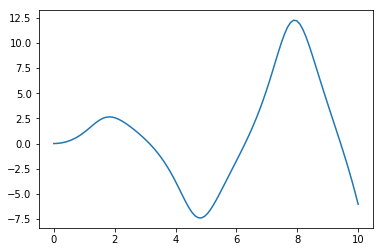

In [19]:
fig,ax = plt.subplots()

ax.plot(t_,Y_)

Text(0,0.5,'Y_dot')

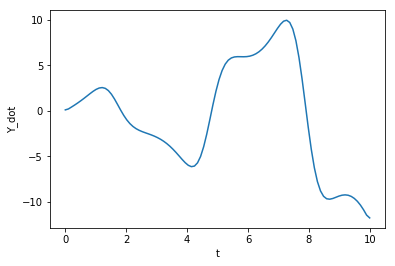

In [20]:
Y_dot_ = np.gradient(Y_,t_)
fig,ax = plt.subplots()
ax.plot(t_,Y_dot_)
ax.set_xlabel('t')
ax.set_ylabel('Y_dot')

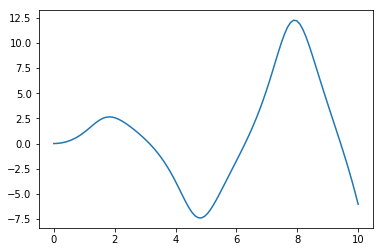

In [21]:
fig,ax = plt.subplots()
Y__ = X_dot_*t_*np.tan(psi_)
ax.plot(t_,Y__)

In [22]:
u,v,psi,X_dot,Y_dot = symbols(r'u v psi X_dot Y_dot')

v = -X_dot*sin(psi) + Y_dot*cos(psi)

v_zero_equation = Eq(v,0)
y_motion = solve(v_zero_equation,Y_dot)
y_motion

[X_dot⋅tan(ψ)]

In [23]:
Y_function = sp.lambdify((psi,X_dot),y_motion,'numpy')

In [24]:
t_ = np.linspace(0,10,100)
A = 1
X_dot_ = 1
omega = 1
psi_ = A*np.sin(omega*t_)

In [25]:
Y_dot_ = Y_function(psi = psi_,X_dot = X_dot_)[0]

Text(0,0.5,'Y_dot')

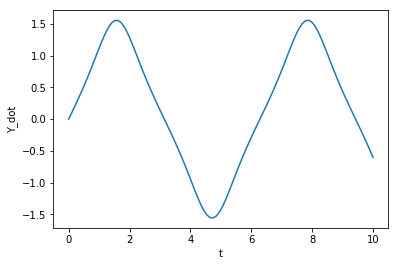

In [28]:
fig,ax = plt.subplots()
ax.plot(t_,Y_dot_)
ax.set_xlabel('t')
ax.set_ylabel('Y_dot')

In [29]:
v_function = sp.lambdify((X_dot,Y_dot,psi),v,'numpy')

In [30]:
v_ = v_function(X_dot = X_dot_,Y_dot = Y_dot_,psi = psi_)

Text(0,0.5,'v')

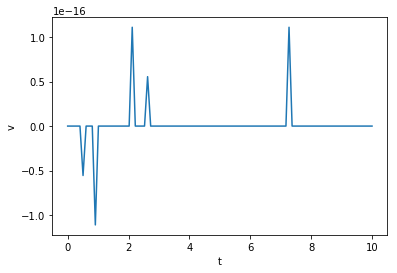

In [31]:
fig,ax = plt.subplots()
ax.plot(t_,v_)
ax.set_xlabel('t')
ax.set_ylabel('v')